#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import data_clean_utils
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px

#### Load the data

In [3]:
# load the data

df = pd.read_csv('swiggy.csv')

df.sample(30)

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
6244   0x6a52    COIMBRES19DEL02                   20                       5   
23337  0xbe9e    COIMBRES01DEL03                   33                     3.5   
2374   0x2d1a      SURRES01DEL01                   20                     4.4   
8005   0x8279      VADRES19DEL01                   33                     4.9   
42628   0xb03      HYDRES20DEL01                   30                     4.5   
39526  0x97a3     CHENRES14DEL02                   37                     4.7   
4650   0x984c     BANGRES07DEL01                   39                     4.8   
43472   0x7f1      SURRES05DEL03                   26                     4.9   
16085   0xed0     PUNERES05DEL03                   24                     4.6   
28638  0x2462      MYSRES05DEL03                   25                     4.6   
26581  0x6dd3     INDORES01DEL02                   28                       5   
40891  0xb889   RANCHIRES18DEL02                   22                       5   
11514   0x4c3      VADRES04DEL01                 NaN                     NaN    
21361  0x60de      HYDRES12DEL01                   29                     4.8   
11261  0x6216   RANCHIRES02DEL02                   39                       5   
17134  0xd7ea      DEHRES02DEL01                   26                     4.9   
12485  0x9672   RANCHIRES11DEL03                   28                     4.7   
35029  0x703e     PUNERES12DEL01                   29                     4.3   
2010   0x9cf3     INDORES18DEL03                   38                     4.6   
1760   0x7e7f      SURRES04DEL02                   31                     4.3   
7527   0x3e39      MUMRES09DEL03                   28                     4.7   
9000   0x5e33     CHENRES17DEL01                   28                     4.8   
34217  0x6956    COIMBRES18DEL02                   22                     4.8   
23467  0x70f3      SURRES02DEL02                   24                     4.5   
2417   0xe047      BHPRES07DEL01                   39                     4.9   
9909   0x92c0     INDORES17DEL02                   33                     4.5   
26290  0x50bd      VADRES16DEL01                   22                     4.7   
19589  0x8585      JAPRES20DEL03                   26                       4   
39168  0x337f     JAPRES010DEL02                   21                     4.8   
43024  0x63f3      JAPRES08DEL03                   21                     4.8   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
6244             11.022298             76.998349                   11.072298   
23337            11.016298             76.972076                   11.106298   
2374             21.186438             72.794115                   21.196438   
8005             22.311844             73.165081                   22.381844   
42628            17.483216             78.552111                   17.553216   
39526            13.026279             80.174568                   13.106279   
4650             12.978453             77.643685                   12.988453   
43472            21.175104             72.804342                   21.265104   
16085            18.543626             73.905101                   18.603626   
28638            12.323978             76.627961                   12.383978   
26581            22.695207             75.866059                   22.745207   
40891            23.351489             85.324253                   23.481489   
11514             0.000000              0.000000                    0.110000   
21361            17.429585             78.392621                   17.439585   
11261             0.000000              0.000000                    0.130000   
17134             0.000000              0.000000                    0.070000   
12485            23.359194             85.325447                   23.449194   
35029            18.520016             73.830547            

#### Data Cleaning

In [4]:
# clean the data using the utils file

data_clean_utils.perform_data_cleaning(data=df)

In [5]:
# load the cleaned data

df_final = pd.read_csv('swiggy_cleaned.csv')

In [6]:
df_final

rider_id   age  ratings  restaurant_latitude  \
0        INDORES13DEL02   37.0      4.9            22.745049   
1        BANGRES18DEL02   34.0      4.5            12.913041   
2        BANGRES19DEL01   23.0      4.4            12.914264   
3       COIMBRES13DEL02   38.0      4.7            11.003669   
4        CHENRES12DEL01   32.0      4.6            12.972793   
...                  ...   ...      ...                  ...   
45497     JAPRES04DEL01   30.0      4.8            26.902328   
45498     AGRRES16DEL01   21.0      4.6                  NaN   
45499    CHENRES08DEL03   30.0      4.9            13.022394   
45500   COIMBRES11DEL01   20.0      4.7            11.001753   
45501  RANCHIRES09DEL02   23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 75.892471          22.765049           75.912471   
1                 77.683237          13.043041           77.813237   
2                 77.678400          12.924264           77.688400   
3                 76.976494          11.053669           77.026494   
4                 80.249982          13.012793           80.289982   
...                     ...                ...                 ...   
45497             75.794257          26.912328           75.804257   
45498                   NaN                NaN                 NaN   
45499             80.242439          13.052394           80.272439   
45500             76.986241          11.041753           77.026241   
45501             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  city_name order_day order_month  \
0      2022-03-19       sunny    high  ...       INDO        19           3   
1      2022-03-25      stormy     jam  ...       BANG        25           3   
2      2022-03-19  sandstorms     low  ...       BANG        19           3   
3      2022-04-05       sunny  medium  ...      COIMB         5           4   
4      2022-03-26      cloudy    high  ...       CHEN        26           3   
...           ...         ...     ...  ...        ...       ...         ...   
45497  2022-03-24       windy    high  ...        JAP        24           3   
45498  2022-02-16       windy     jam  ...        AGR        16           2   
45499  2022-03-11      cloudy     low  ...       CHEN        11           3   
45500  2022-03-07      cloudy    high  ...      COIMB         7           3   
45501  2022-03-02         fog  medium  ...     RANCHI         2           3   

       order_day_of_week is_weekend pickup_time_minutes  order_time_hour  \
0               saturday          1                15.0             11.0   
1                 friday          0                 5.0             19.0   
2               saturday          1                15.0              8.0   
3                tuesday          0                10.0             18.0   
4               saturday          1                15.0             13.0   
...                  ...        ...                 ...              ...   
45497           thursday          0                10.0             11.0   
45498          wednesday          0                15.0             19.0   
45499             friday          0                15.0             23.0   
45500             monday          0                 5.0             13.0   
45501          wednesday          0                 5.0             17.0   

      order_time_of_day   distance  distance_type  
0               morning   3.025149          short  
1               evening  20.183530      very_long  
2               morning   1.552758          short  
3               evening   7.790401         medium  
4             afternoon   6.210138         medium  
...                 ...        ...            ...  
45497           morning   1.489846          short  
45498           evening        NaN            NaN  
45499             night   4.657195          short  
45500         afternoon 

#### Preliminary Analysis

In [7]:
# check for missing values in the data

df_final.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day       2070
distance                3630
distance_type           3630
dtype: int64

In [8]:
# number of rows in the data that have missing values

missing_rows = (
    df_final
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} rows with missing values in the data.')

print(f"It accounts for {(missing_rows/df_final.shape[0])*100:.2f}% of the data")

There are 7807 rows with missing values in the data.
It accounts for 17.16% of the data


**The initial percentage of missing data was `9.2%` and increased to `16.35%` because we transformed 0 values in the lat long columns to NaN**

In [9]:
# check for duplicate rows in the data

df_final.duplicated().sum()

0

**There are no duplicate rows in the data and none were created by our data cleaning step**

In [10]:
# data types of features

df_final.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather                  object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken                int64
city_name                object
order_day                 int64
order_month               int64
order_day_of_week        object
is_weekend                int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_of_day        object
distance                float64
distance_type            object
dtype: object

In [11]:
# numerical and categorical columns

num_cols = df_final.columns[[1,2,3,4,5,6,16,22,25]].tolist()
cat_cols = [col for col in df_final.columns.tolist() if col not in num_cols]

print(f'There are {len(num_cols)} numerical columns and {len(cat_cols)} categorical columns in the data.')

There are 9 numerical columns and 18 categorical columns in the data.


In [12]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'pickup_time_minutes',
 'distance']

In [13]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day',
 'distance_type']

In [14]:
# statistical summary of numerical columns

df_final[num_cols].describe()

age       ratings  restaurant_latitude  restaurant_longitude  \
count  43648.000000  43594.000000         41872.000000          41872.000000   
mean      29.555008      4.635287            18.913696             76.921664   
std        5.761482      0.313827             5.467265              3.503107   
min       20.000000      2.500000             9.957144             72.768726   
25%       25.000000      4.500000            12.986047             73.897902   
50%       30.000000      4.700000            19.065838             76.618203   
75%       35.000000      4.900000            22.751234             78.368855   
max       39.000000      5.000000            30.914057             88.433452   

       delivery_latitude  delivery_longitude    time_taken  \
count       41872.000000        41872.000000  45502.000000   
mean           18.977356           76.985325     26.297591   
std             5.469056            3.503260      9.386419   
min             9.967144           72.778726     10.000000   
25%            13.065996           73.940327     19.000000   
50%            19.124049           76.662620     26.000000   
75%            22.820040           78.405467     32.000000   
max            31.054057           88.563452     54.000000   

       pickup_time_minutes      distance  
count         43862.000000  41872.000000  
mean              9.989399      9.719296  
std               4.087516      5.602890  
min               5.000000      1.465067  
25%               5.000000      4.657655  
50%              10.000000      9.193014  
75%              15.000000     13.680920  
max              15.000000     20.969489

In [15]:
# statistical summary of categorical columns

(
    df_final
    .assign(**{
        col: df_final[col].astype("object")
        for col in cat_cols
    })
    .describe(include="object")
    .T
)

count unique              top     freq
rider_id               45502   1320  PUNERES01DEL01        67
order_date             45502     44       2022-03-15     1190
weather                44977      6              fog     7654
traffic                44992      4              low    15477
vehicle_condition      45502      4                2    15034
type_of_order          45502      4            snack    11512
type_of_vehicle        45502      4       motorcycle    26427
multiple_deliveries  44509.0    4.0              1.0  28109.0
festival               45274      2               no    44380
city_type              44304      3    metropolitian    34029
city_name              45502     22              JAP     3439
order_day              45502     30                3     2323
order_month            45502      3                3    31919
order_day_of_week      45502      7        wednesday     7077
is_weekend             45502      2                0    32995
order_time_hour      43862.0   17.0             21.0   4686.0
order_time_of_day      43432      4            night    13773
distance_type          41872      4           medium    11288

#### Missing Value Analysis

In [16]:
import missingno as msno

##### Matrix Plot

<Axes: >

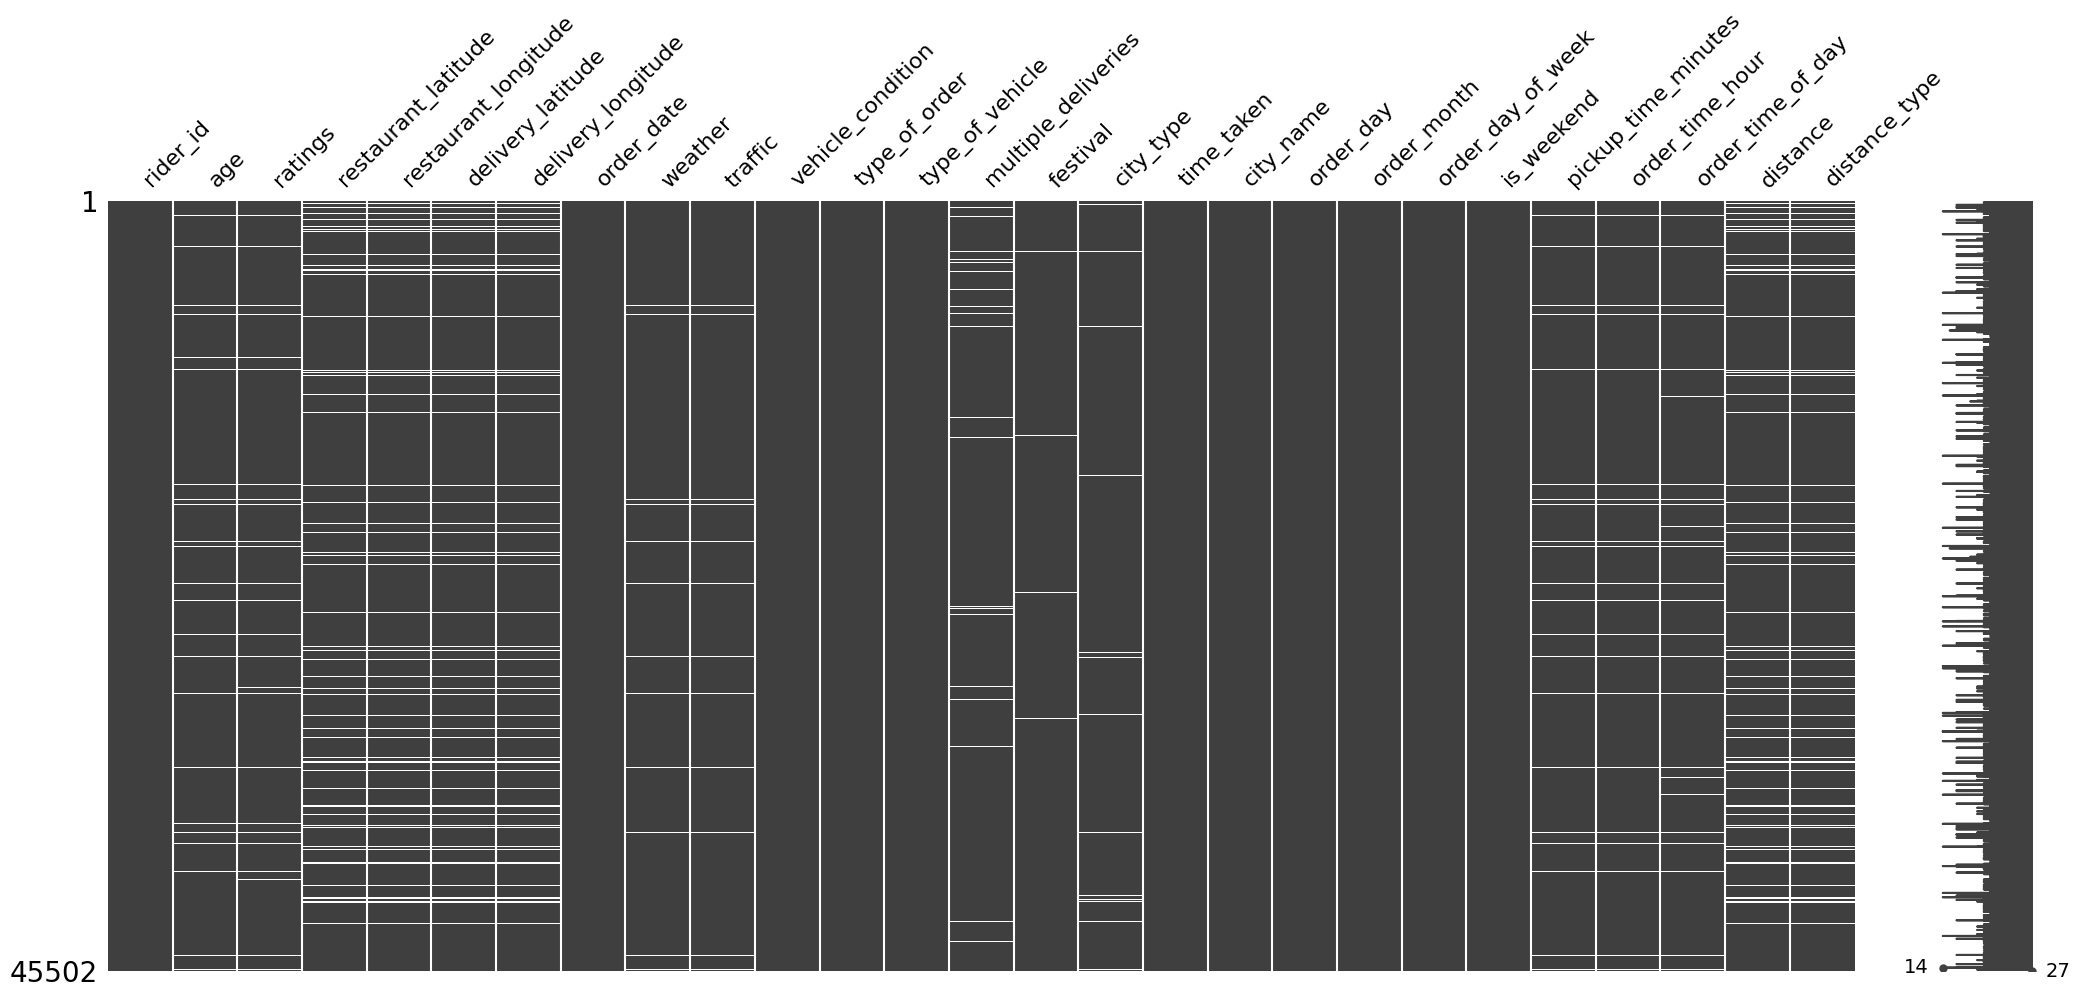

In [18]:
msno.matrix(df_final)

##### Corr